In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ 3 курс/all_features.csv") #менять на свой путь

In [7]:
# разбиваем датафрейм на группы по 5 строк
groups = [df[i:i+5] for i in range(0, len(df), 5)]
new_groups = []
# перемешиваем каждую группу
for group in groups:
    new_groups.append(group.sample(frac=1))

# объединяем группы обратно в один датафрейм
df_shuffled = pd.concat(new_groups)

In [8]:
X = df_shuffled[[ 'polarity', 'subjectivity',
       'num_of_symbols', 'percent_of_len_stop_words',
       'avg_len_word', 'punctuation', 'sentences', 'connection',
       'symbols_by_avg', 'words_by_avg']]
y = df_shuffled['score'].values     

In [9]:
qid_df = df_shuffled['Unnamed: 0'].values

In [11]:
params = {'objective': 'rank:map',
          'eval_metric': ['ndcg@5'],
          'max_depth': 4,
          'learning_rate': 0.05}

In [12]:
ddf = xgb.DMatrix(X, y, qid = qid_df ) 

In [13]:
cv_results = xgb.cv(
    params=params,
    dtrain= ddf,
    num_boost_round= 100,
    nfold= 5,
    metrics=['ndcg@5', 'map'],
    early_stopping_rounds=10,
    verbose_eval= 5,
    as_pandas = True
)


[0]	train-ndcg@5:0.81215+0.00050	train-map:0.93352+0.00029	test-ndcg@5:0.81197+0.00071	test-map:0.93322+0.00045
[5]	train-ndcg@5:0.81508+0.00046	train-map:0.93463+0.00024	test-ndcg@5:0.81469+0.00009	test-map:0.93423+0.00045
[10]	train-ndcg@5:0.81623+0.00103	train-map:0.93500+0.00035	test-ndcg@5:0.81603+0.00105	test-map:0.93467+0.00051
[15]	train-ndcg@5:0.81759+0.00051	train-map:0.93537+0.00022	test-ndcg@5:0.81745+0.00084	test-map:0.93502+0.00030
[20]	train-ndcg@5:0.81853+0.00023	train-map:0.93570+0.00014	test-ndcg@5:0.81839+0.00059	test-map:0.93538+0.00027
[25]	train-ndcg@5:0.81897+0.00029	train-map:0.93583+0.00013	test-ndcg@5:0.81878+0.00063	test-map:0.93558+0.00030
[30]	train-ndcg@5:0.81917+0.00021	train-map:0.93593+0.00013	test-ndcg@5:0.81883+0.00058	test-map:0.93565+0.00026
[35]	train-ndcg@5:0.81930+0.00014	train-map:0.93597+0.00012	test-ndcg@5:0.81896+0.00058	test-map:0.93569+0.00024
[40]	train-ndcg@5:0.81939+0.00016	train-map:0.93600+0.00011	test-ndcg@5:0.81905+0.00049	test-map:0

In [14]:
cv_results

,train-ndcg@5-mean,train-ndcg@5-std,train-map-mean,train-map-std,test-ndcg@5-mean,test-ndcg@5-std,test-map-mean,test-map-std
0,0.812153,0.000504,0.933523,0.000287,0.811967,0.000708,0.933217,0.000448
1,0.813491,0.000710,0.934079,0.000237,0.813169,0.000745,0.933677,0.000396
2,0.814029,0.000575,0.934255,0.000249,0.813693,0.000651,0.933914,0.000262
3,0.814590,0.000254,0.934393,0.000235,0.814198,0.000252,0.934107,0.000386
4,0.814849,0.000389,0.934485,0.000326,0.814472,0.000278,0.934220,0.000387
...,...,...,...,...,...,...,...,...
57,0.819595,0.000118,0.936041,0.000087,0.819271,0.000534,0.935790,0.000263
58,0.819602,0.000121,0.936044,0.000090,0.819263,0.000541,0.935791,0.000254
59,0.819613,0.000123,0.936047,0.000092,0.819270,0.000543,0.935794,0.000286
60,0.819621,0.000142,0.936049,0.000092,0.819308,0.000554,0.935809,0.000281


In [15]:
bst = xgb.train(params, ddf, num_boost_round = 100)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

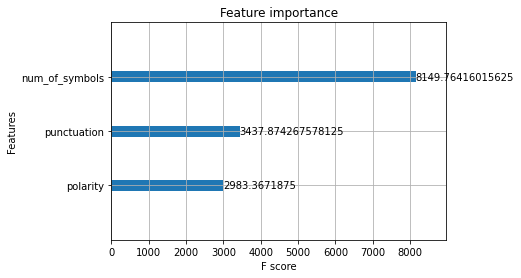

In [26]:
xgb.plot_importance(bst, importance_type='cover', max_num_features=3)

test

In [27]:
df_test = pd.read_csv("/content/drive/MyDrive/ 3 курс/test_with_features.csv") #менять на свой путь

In [28]:
X_test = df_test[[ 'polarity', 'subjectivity',
       'num_of_symbols', 'percent_of_len_stop_words',
       'avg_len_word', 'punctuation', 'sentences', 'connection',
       'symbols_by_avg', 'words_by_avg']]
#y_test = df_test['score'].values     

In [29]:
qid_test = df_test['Unnamed: 0'].values

In [30]:
dtest = xgb.DMatrix(X_test, qid = qid_test) 

In [31]:
y_pred = bst.predict(dtest) 

In [38]:
arr = y_pred.reshape(y_pred.shape[0]//5, 5)
int_preds= [] # наши скоры в формате ранжирования от 0 до 4
for st in arr:
  sorted_idxs = np.argsort(st)[::-1]

  value_map = {val: i for i, val in enumerate(sorted(st)[::-1])}

  def map_values(val):
    return value_map[val]
  
  new_pred = np.vectorize(map_values)(st)
  int_preds.append(new_pred)

сохраняем результаты

In [40]:
import json
# Загрузка файла jsonl
with open('/content/drive/MyDrive/ 3 курс/ranking_test.jsonl') as f: #менять на свой путь
    lines = f.readlines()

In [45]:
with open('updated_test.jsonl', 'w') as f: #создаем новый json, где теперь будут скоры с числами
    for i, line in enumerate(lines):
        obj = json.loads(line.strip())
        for j, score in enumerate(int_preds[i]):
            obj['comments'][j]['score'] = int(score)
        f.write(json.dumps(obj) + '\n')